# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [ ]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [ ]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | Flew ATL to LHR 8th Jan 202...
1,Not Verified | Great thing about British Airw...
2,Not Verified | The staff are friendly. The pla...
3,✅ Trip Verified | Probably the worst business ...
4,"✅ Trip Verified | Definitely not recommended, ..."


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df.to_csv("/content/drive/MyDrive/BA tasks/Task 1/BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [ ]:
df.shape

(1000, 1)

In [ ]:
df.head(10)

,reviews
0,✅ Trip Verified | Flew ATL to LHR 8th Jan 202...
1,Not Verified | Great thing about British Airw...
2,Not Verified | The staff are friendly. The pla...
3,✅ Trip Verified | Probably the worst business ...
4,"✅ Trip Verified | Definitely not recommended, ..."
5,✅ Trip Verified | BA shuttle service across t...
6,✅ Trip Verified | I must admit like many other...
7,Not Verified | When will BA update their Busi...
8,✅ Trip Verified | Paid £200 day before flight...
9,✅ Trip Verified | BA website did not work (we...


In [ ]:
for index, row in df.iterrows():
    if "✅ Trip Verified" in row['reviews']:
        df.at[index, 'reviews'] = row['reviews'].replace("✅ Trip Verified", "")


In [ ]:
df.head()

,reviews
0,| Flew ATL to LHR 8th Jan 2023. Was unlucky ...
1,Not Verified | Great thing about British Airw...
2,Not Verified | The staff are friendly. The pla...
3,| Probably the worst business class experienc...
4,"| Definitely not recommended, especially for ..."


In [ ]:
for index, row in df.iterrows():
    if "Not Verified" in row['reviews']:
        df.at[index, 'reviews'] = row['reviews'].replace("Not Verified", "")

In [ ]:
df.head()

,reviews
0,| Flew ATL to LHR 8th Jan 2023. Was unlucky ...
1,| Great thing about British Airways A380 is ...
2,"| The staff are friendly. The plane was cold,..."
3,| Probably the worst business class experienc...
4,"| Definitely not recommended, especially for ..."


In [ ]:
print(df['reviews'][0])

 |  Flew ATL to LHR 8th Jan 2023. Was unlucky enough to be on board a 23 year old 777. Refit gave it a decent IFE screen and the seat looked decent. Although combine the IFE with the cheap and nasty earbuds, and any movie can be ruined. Headrest was great, just a pity little padding is used on the seat as my Wife and I were very uncomfortable. The leg room in general is poor, especially when passengers keep their seat reclined from start to finish. Zero room. Aircraft was tired. Rubber spacers falling out, silicone sealer falling apart in the toilets. Toilet seats old, stained. Rubber on arm rest was hanging off. No post take off drinks/snacks offered.  Meal was sent out after a couple of hours. Was poor. Chicken cubes that reminded me of dog food, mashed potatoes that were purified within an inch of their life. Stale rock hard roll, salad which was rice and carrots?! Dried crackers with no cheese. Kids meal was just as sad. Tiny leaf salad with enough dressing to refloat a shipwreck. 

In [ ]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 28.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.4/182.4 KB 24.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 95.5 MB/s eta 0:00:00


In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import re
import numpy as np

Create sentiment model 

In [ ]:
tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

Downloading:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/953 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/872k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/669M [00:00<?, ?B/s]

calucalate sentiment

In [ ]:
tokens = tokenizer.encode(df['reviews'].iloc[0], return_tensors='pt')

In [ ]:
result = model(tokens)

In [ ]:
result.logits

tensor([[ 3.1820,  2.4146,  0.2870, -2.0066, -3.1695]],
       grad_fn=<AddmmBackward0>)

In [ ]:
int(torch.argmax(result.logits))+1

1

Use all df reviews to score and add colum score

In [ ]:
def sentiment_score(review):
    tokens = tokenizer.encode(review, return_tensors='pt')
    result = model(tokens)
    return int(torch.argmax(result.logits))+1

In [ ]:
sentiment_score(df['reviews'].iloc[1])

3

In [ ]:
df['sentiment'] = df['reviews'].apply(lambda x: sentiment_score(x[:512]))

In [ ]:
df

,reviews,sentiment
0,| Flew ATL to LHR 8th Jan 2023. Was unlucky ...,2
1,| Great thing about British Airways A380 is ...,2
2,"| The staff are friendly. The plane was cold,...",2
3,| Probably the worst business class experienc...,1
4,"| Definitely not recommended, especially for ...",2
...,...,...
995,| Naples to Gatwick. The online check-in woul...,2
996,| I have been flying with BA for the last 32 ...,2
997,| I traveled on British Airways with my wife ...,1
998,| Flew British Airways from Budapest to Londo...,1


In [ ]:
df.head(10)

,reviews,sentiment
0,| Flew ATL to LHR 8th Jan 2023. Was unlucky ...,2
1,| Great thing about British Airways A380 is ...,2
2,"| The staff are friendly. The plane was cold,...",2
3,| Probably the worst business class experienc...,1
4,"| Definitely not recommended, especially for ...",2
5,| BA shuttle service across the UK is still ...,4
6,| I must admit like many others I tend to avo...,2
7,| When will BA update their Business class c...,2
8,| Paid £200 day before flight for an upgrade...,2
9,| BA website did not work (weirdly deleted m...,1


In [ ]:
df.tail(10)

,reviews,sentiment
990,| London Heathrow to Dallas. The aircraft wa...,2
991,| Decided to go in Club Europe for this relat...,2
992,| BA used to be a byword for quality and serv...,1
993,| Premium economy worse than most airlines ec...,1
994,| Flew Belfast to London with British Airways...,1
995,| Naples to Gatwick. The online check-in woul...,2
996,| I have been flying with BA for the last 32 ...,2
997,| I traveled on British Airways with my wife ...,1
998,| Flew British Airways from Budapest to Londo...,1
999,| The air conditioning didn’t work in the par...,2


In [ ]:
df['reviews'][5]

' |  BA shuttle service across the UK is still surprisingly a good product. When compared with BA long haul that doesn’t always get the best of comments at times. It’s reasonable priced, works well, fresh crews and no queues or long distances to walk. I don’t know why they still offer a COVID style bottle of water and snack when just stretching to a cup of tea and snack would be great add on for this service. Currently they have an on line sky cafe but it’s too fiddly to work or get connected in short trips.'

In [ ]:
df['reviews'][992]

' | BA used to be a byword for quality and service. You simply can’t say that anymore and the only thing that seems to have stayed the same is the ticket price. I paid 600 dollars for my ticket from Istanbul to London with BA. For that price there is no airbridge (you will wait on a crowded bus) and no entertainment (note: this is a 4 hour flight. Also, screen devices larger than a phone are banned from this flight, so no alternative of watching movies on your iPad). Oh and you’ll have to buy any food and drinks on board. I flew BA on this route because no other flight time worked for me, however Turkish Airlines is by far the better option, with airbridge, free hot meals and a modern entertainment system. Pegasus and AtlasGlobal offer a similar service to BA but at far lower prices. It seems to be the same all over. BA used to be a first choice but at this price, for this service, it’s become a last resort.'

In [ ]:
# get a count of the complete booking from this df
df['sentiment'].value_counts()

1    435
2    206
4    152
5    128
3     79
Name: sentiment, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


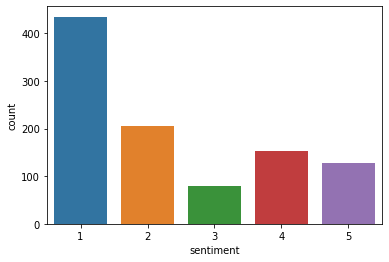

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# get a visual on this 
sns.countplot(df['sentiment'])

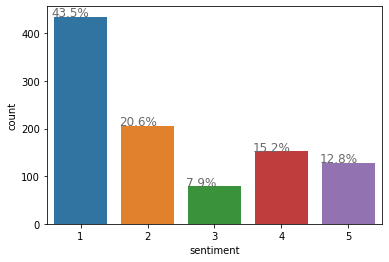

In [ ]:
# Create a countplot using seaborn
ax = sns.countplot(x='sentiment', data=df)

# Calculate percentages for each data point
totals = []
for i in ax.patches:
    totals.append(i.get_height())

total = sum(totals)

# Set the labels for the countplot
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()-.03, i.get_height()+.5, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=12,
color='dimgrey')

# Show the plot
plt.show()

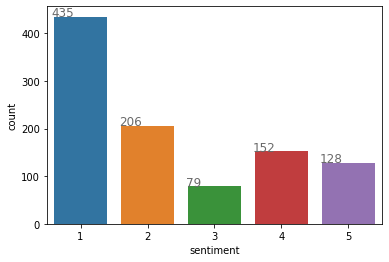

In [ ]:
# Create a countplot using seaborn
ax = sns.countplot(x='sentiment', data=df)

# Set the labels for the countplot
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()-.03, i.get_height()+.5, \
            str(i.get_height()), fontsize=12, color='dimgrey')

# Show the plot
plt.show()